In [ ]:
#Imstalling dependencies  
%pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [ ]:
import cv2 #To open camera
import numpy as np #To work with array and vectoring
import os 
from matplotlib import pyplot as plt  #Matrices and arrays
import time #Time library to know time for each function
import mediapipe as mp #Googles human vector point tracking library

Keypoints using MP Holistic

In [ ]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False # Image is no longer writeable
    results = model.process(image)# Make prediction
    image.flags.writeable = True # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) #Here what we are doing is giving keypoints in the face a different color so it can be easily distinguished
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) #Same way here for the pose or stature landmark we are putting different colors one for the line joining keypoints other for the keypoints itself
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) # These are giving color and thickness to keypoints and line joining them in the left hand
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) #Same way these are colouring of landmarks in the right hand

In [ ]:
cap = cv2.VideoCapture(0)
# Opening the mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Reading feed
        ret, frame = cap.read()

        # finding keypoints
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks on hand and face
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break from the code
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

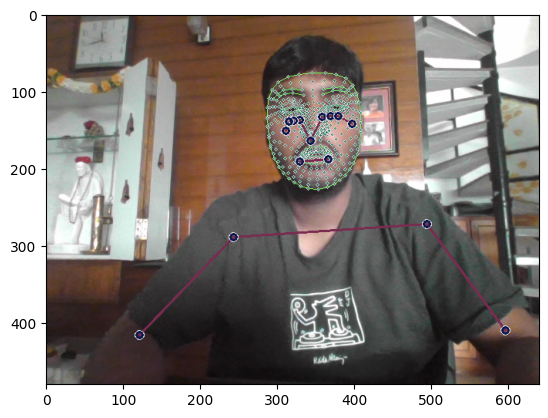

In [16]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extract keypoint Value

In [17]:
pose = [] #Empty array
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])#Making a collection of all landmark data being collected 
    pose.append(test)#Appending all these data into pose array

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) #This is a type of command to flatten all the colected data in x,y,z and if no data fill in with zeroes of in matrix in pose
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) #This is a type of command to flatten all the colected data in x,y,z and if no data fill in with zeroes in matrix in facelandmark
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#This is a type of command to flatten all the colected data in x,y,z and if no data fill in with zeroes in matrix in left hand landmark 21*3 is no of row and column
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) #Same for right hand

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) # landmarks include x, y, z coordinates, and visibility, it flattens the data into a 1D NumPy array with shape (33*4,) and fills 0 if no data
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) #Does the same for face landmarks 
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)# Does the same for left hand landmarks
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#Does the same for right hand
    return np.concatenate([pose, face, lh, rh]) #concatenates all the flattened arrays into a single 1D NumPy array 

In [24]:
result_test = extract_keypoints(results)#Saving 

In [26]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.53616691,  0.34337899, -1.05315804, ...,  0.        ,
        0.        ,  0.        ])

Folder Collections


In [27]:
DATA_PATH = os.path.join('MP_Data') # Path of data storage of numpy arrays
actions = np.array(['hello', 'good', 'bad','weather','news','general','what','is','ML','thank you','how','your','day','in','bombay'])# Actions we wan to train to detect
no_sequences = 30 #No of videos
sequence_length = 30 #Each Videos are 30 frames in length

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collecting Keypoints and start training model

In [ ]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:# Setting up mediapipe
    for action in actions:
        for sequence in range(no_sequences): # Loop through sequences
            # Loop through video length
            for frame_num in range(sequence_length):

                # Reading feed
                ret, frame = cap.read()

                # Making mediapipe markings
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), #Lets user know the collecction of data collection is about to start
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)#Font, size and color of data
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA) #The {} is used to indicate what video number is being recorded
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()